In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
print('Libraries imported.')

Libraries imported.


In [13]:
df = pd.read_csv('data/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [15]:
df.isnull().sum()/len(df) * 100

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

since percentage of missing values is very less, we will just drop the missing value columns.

In [16]:
df.dropna(inplace=True)
df.isnull().sum()/len(df) * 100

TransactionID              0.0
CustomerID                 0.0
CustomerDOB                0.0
CustGender                 0.0
CustLocation               0.0
CustAccountBalance         0.0
TransactionDate            0.0
TransactionTime            0.0
TransactionAmount (INR)    0.0
dtype: float64

In [17]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [18]:
df = df[df['CustAccountBalance'] >= 0]
df = df[df['TransactionAmount (INR)'] >= 0]
df.drop(columns='TransactionTime',axis=1, inplace=True)
df.describe()

,CustAccountBalance,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.566096e+03
std,8.467609e+05,6.561464e+03
min,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.600000e+02
50%,1.676852e+04,4.575000e+02
75%,5.742885e+04,1.200000e+03
max,1.150355e+08,1.560035e+06


## Feature Engineering

In [19]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5


In [20]:
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
df = df[(df['CustomerAge'] >= 0) & (df['CustomerAge'] <= 100)]
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,28
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,566.0,24


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901348 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            901348 non-null  object        
 1   CustomerID               901348 non-null  object        
 2   CustomerDOB              901348 non-null  datetime64[ns]
 3   CustGender               901348 non-null  object        
 4   CustLocation             901348 non-null  object        
 5   CustAccountBalance       901348 non-null  float64       
 6   TransactionDate          901348 non-null  datetime64[ns]
 7   TransactionAmount (INR)  901348 non-null  float64       
 8   CustomerAge              901348 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 68.8+ MB


In [22]:
df.replace(r'(.*HYDERABAD.*)','HYDERABAD',regex=True, inplace = True)
df.replace(r'(.*PUNE.*)','PUNE',regex=True, inplace = True)
df.replace(r'(.*AHMEDABAD.*)','AHMEDABAD',regex=True, inplace = True)
df.replace(r'(.*MUMBAI.*)','MUMBAI',regex=True, inplace = True)
df.replace(r'(.*BANGALORE.*)','BANGALORE',regex=True, inplace = True)
df.replace(r'(.*DELHI.*)','DELHI',regex=True, inplace = True)
df.replace(r'(.*RAJKOT.*)','RAJKOT',regex=True, inplace = True)
df.replace(r'(.*THANE.*)','THANE',regex=True, inplace = True)
df.replace(r'(.*CHENNAI.*)','CHENNAI',regex=True, inplace = True)
df.replace(r'(.*COIMBATORE.*)','COIMBATORE',regex=True, inplace = True)
df.replace(r'(.*JAIPUR.*)','JAIPUR',regex=True, inplace = True)
df.replace(r'(.*KOLKATA.*)','KOLKATA',regex=True, inplace = True)

## Location Analysis
### Top 20 Cities in terms of number of transactions

In [23]:
loc_count = df['CustLocation'].value_counts()
loc_count = pd.DataFrame(loc_count)
loc_count.reset_index(inplace=True)
loc_count.columns = ['City','Count']
loc_count

,City,Count
0,DELHI,131411
1,MUMBAI,114718
2,BANGALORE,78595
3,GURGAON,64564
4,NOIDA,29340
...,...,...
5088,SCHOOL KHARAGPUR,1
5089,GANDHI NAGR,1
5090,PERIYAR NAOTER,1
5091,SWINDON,1


In [24]:
df['CustomerAge'].sort_values()

128470     0
114611     0
161006     1
638862     1
839617     1
          ..
494756    43
966521    43
274085    43
495631    43
141190    43
Name: CustomerAge, Length: 901348, dtype: int64

<Axes: xlabel='Count', ylabel='City'>

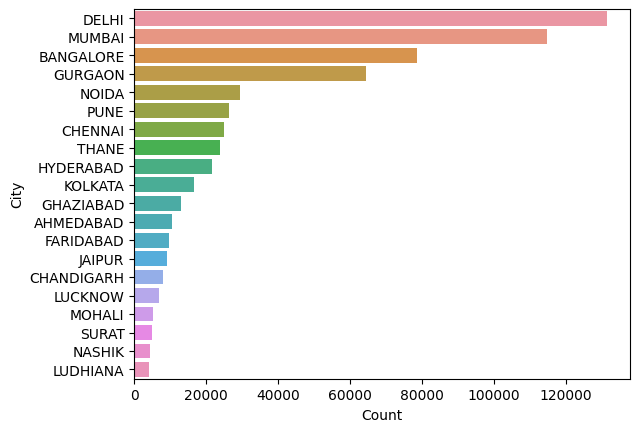

In [25]:
top = 20
loc_count = loc_count[:top]
sns.barplot(y='City', x='Count', data=loc_count)

In [26]:
x = pd.DataFrame(df['CustLocation'].value_counts())
x = x.reset_index()
x.columns = ['City','Count']
one = list(x.loc[x['Count'] == 1]['City'])
one

['KRISHNA NAGAR',
 'PH III GURGAON',
 'BEKHAMPUR',
 'XAVIERS HIGH SCHOOL SURAT',
 'BH SRUNGERI SERVICE STATION',
 'MANDI GURHARSAHI',
 'ALWAR RAJ',
 'PHAPHUNO',
 'PATNA SADAR PATNA',
 'MAHADEV MANDIR  SURAT',
 'ASSAM NEAR SBI JORHAT',
 'BASMAT',
 'KHANDAVALLI WEST GODAVARI',
 'HANAMKONDA,WARANGAL',
 'BERI',
 'HAMPSHIRE',
 'MATIHA',
 'SINGHANA',
 'GAUTTAM BUDDA NAGAR',
 'RANGAREDDY RANGAREDDY',
 'DIST AMRITSAR AMRITSAR',
 'THANABHAWAN',
 'PRAKASAM DISTT',
 'NR COMMUNITY HALL SURAT',
 'TIRUPPUR DIST',
 'SALVADOR DO MUNDO',
 'BISTUPUR JAMSHEDPUR',
 'MONALI',
 'THANI',
 'GANDHI NAGAR NASHIK',
 'CAVELOSSIM SALCETE',
 'DAHANU ROAD W',
 'MANDIR ASANSOL',
 'ASKAGANJAM',
 'KOPPARA',
 'KILLORGLIN',
 'JAJPUR(DISTRICT)',
 'DIVA E',
 'CHIKKKABALLAPUR',
 'AMBIVLI WEST',
 'KALNA',
 'BEGUMPET',
 'ALTO-PROVORIM',
 'KUNDLI SONIPAT',
 'CHOURAHA PATNA',
 'SIMBEGA',
 'NALASOPARA E',
 'KARKALA TALUK',
 'COLLEGE NASHIK',
 'TAL KANCHEEPURAM DIST KANCHEEPURAM',
 'TAMBHERE',
 'BAKROL (PART)',
 'DIST SENAPATI',


In [27]:
df.shape

(901348, 9)

In [28]:
df.drop(df[df['CustLocation'].isin(one)].index, inplace=True)
df.shape

(900359, 9)

## Transaction Analysis

In [29]:
df['month_year'] = df['TransactionDate'].dt.strftime('%b %Y')
df['month_year'] = pd.to_datetime(df['month_year'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,month_year
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22,2016-02-01
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20,2016-02-01
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43,2016-02-01
4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28,2016-02-01
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,566.0,24,2016-02-01


In [30]:
time = df.groupby('TransactionDate').agg({'TransactionAmount (INR)':'sum'})
time = time.reset_index()
time.columns = ['Date','Amount']
time.head()

,Date,Amount
0,2016-01-08,21410135.98
1,2016-01-09,23329591.09
2,2016-02-08,21895509.24
3,2016-02-09,25881037.38
4,2016-03-08,22305940.04


In [31]:
time.sort_values(by='Date', inplace=True, ascending=True)
time.head()

,Date,Amount
0,2016-01-08,21410135.98
1,2016-01-09,23329591.09
2,2016-02-08,21895509.24
3,2016-02-09,25881037.38
4,2016-03-08,22305940.04


In [32]:
fig = px.line(time, x='Date', y='Amount', title='Total Amount Transacted over time')
fig.show()

no consistent patterns in the transaction amount over the years

## Account balance Analysis

In [33]:
acc_bal = df.groupby('CustomerID').agg({'CustAccountBalance':'mean','CustomerAge':'mean', 'TransactionID':'count', 'TransactionAmount (INR)':'mean'})
acc_bal = acc_bal.reset_index()
acc_bal.columns = ['CustomerID','AccountBalance','CustomerAge', 'TransactionCount', 'TransactionAmount']
acc_bal.head()

,CustomerID,AccountBalance,CustomerAge,TransactionCount,TransactionAmount
0,C1010011,76340.635,28.5,2,2553.0
1,C1010012,24204.490,22.0,1,1499.0
2,C1010014,100112.950,28.0,2,727.5
3,C1010018,496.180,26.0,1,30.0
4,C1010028,296828.370,28.0,1,557.0


In [34]:
acc_bal['AccountBalanceCategory'] = pd.qcut(acc_bal['AccountBalance'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
acc_bal.head()


,CustomerID,AccountBalance,CustomerAge,TransactionCount,TransactionAmount,AccountBalanceCategory
0,C1010011,76340.635,28.5,2,2553.0,Very High
1,C1010012,24204.490,22.0,1,1499.0,Medium
2,C1010014,100112.950,28.0,2,727.5,Very High
3,C1010018,496.180,26.0,1,30.0,Very Low
4,C1010028,296828.370,28.0,1,557.0,Very High


In [35]:
mean_acc_bal = acc_bal.groupby('AccountBalanceCategory').agg({'AccountBalance':'mean','CustomerAge':'mean' ,'CustomerID':'count', 'TransactionCount':'sum', 'TransactionAmount':'mean'})
mean_acc_bal = mean_acc_bal.reset_index()
mean_acc_bal.columns = ['AccountBalanceCategory','MeanAccountBalance','MeanCustomerAge', 'NoOfCustomers', 'NoOfTransactions', 'MeanTransactionAmount']
mean_acc_bal

,AccountBalanceCategory,MeanAccountBalance,MeanCustomerAge,NoOfCustomers,NoOfTransactions,MeanTransactionAmount
0,Very Low,1040.510677,27.621365,155357,164267,816.967407
1,Low,6822.853356,27.866180,155358,178071,896.732190
2,Medium,16615.474516,28.743552,155365,184692,1065.786527
3,High,41010.005401,29.711598,155346,187632,1469.998931
4,Very High,343204.021500,31.190976,155357,185697,2243.717150


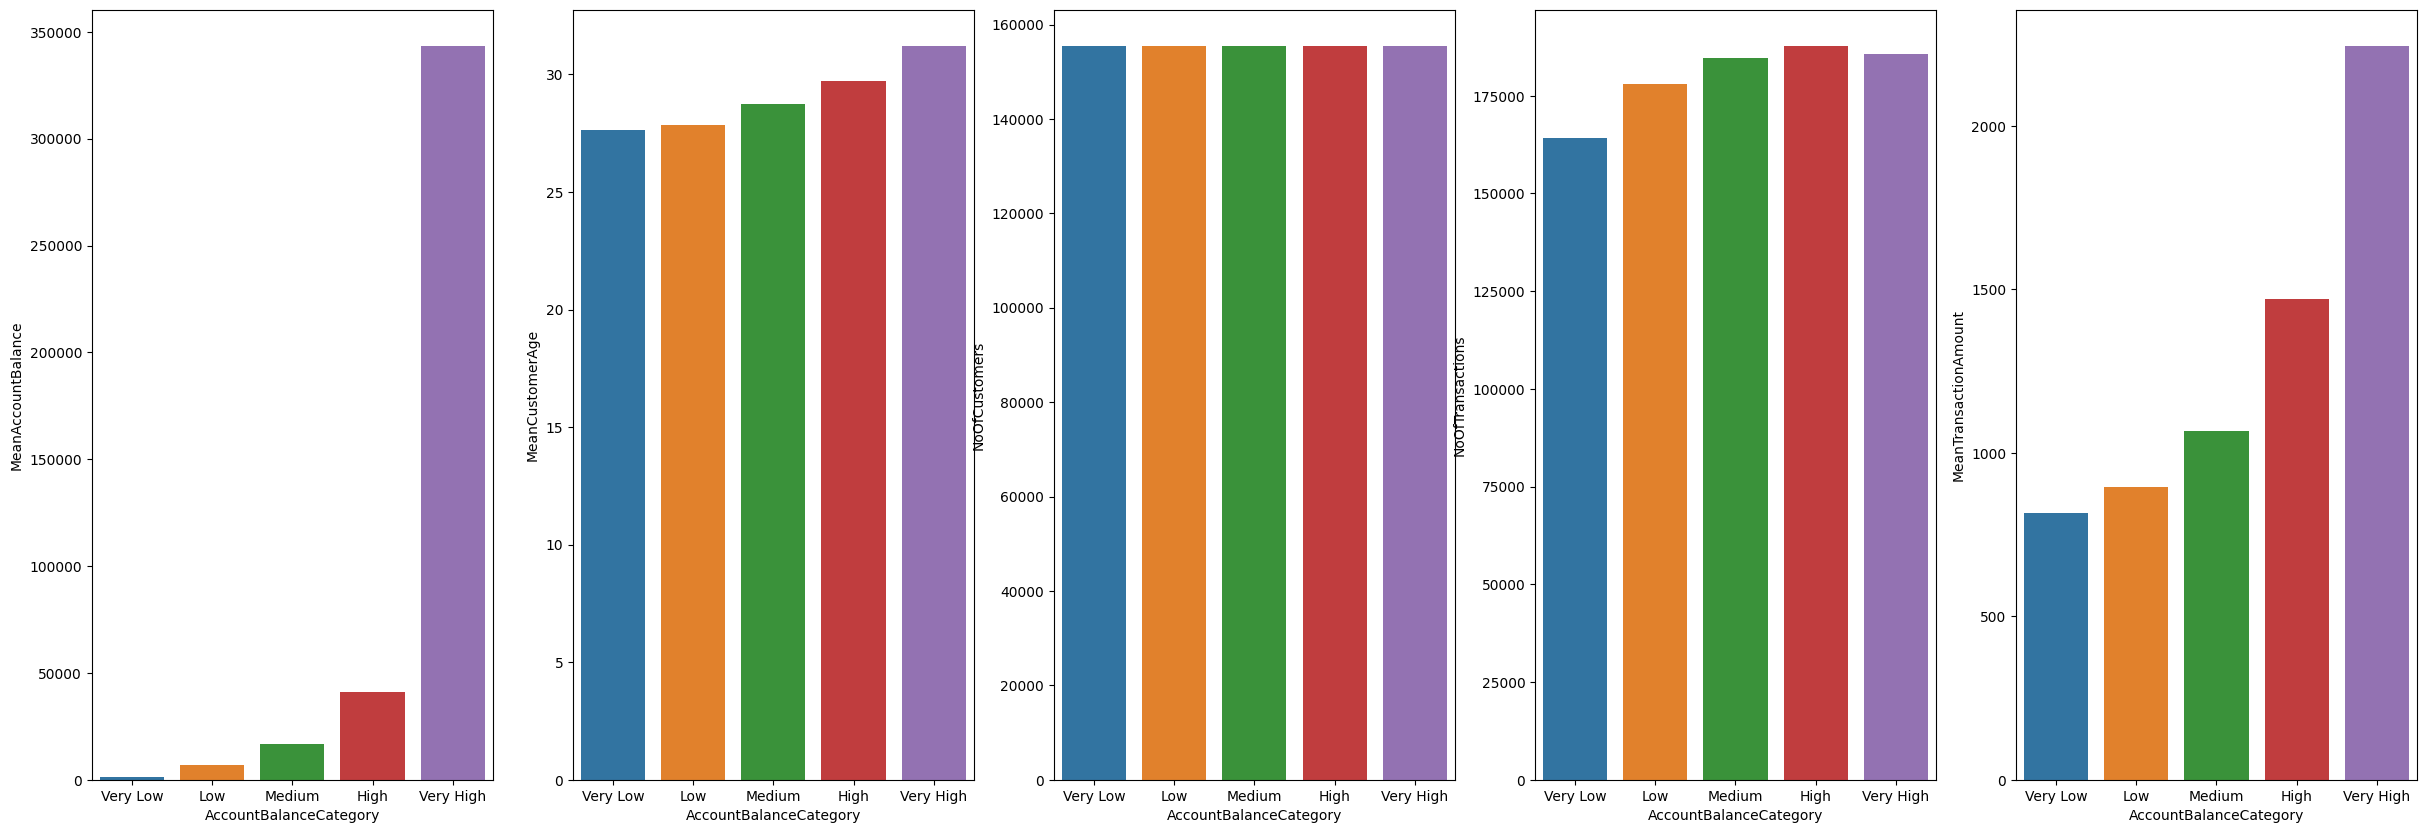

In [36]:
features = ['MeanAccountBalance', 'MeanCustomerAge','NoOfCustomers', 'NoOfTransactions', 'MeanTransactionAmount']

fig, ax = plt.subplots(1, 5, figsize=(30, 10))

for i, feature in enumerate(features):
    sns.barplot(x='AccountBalanceCategory', y=feature, data=mean_acc_bal, ax=ax[i])

In [37]:
df['CustomerAge'].sort_values(ascending=True)

114611     0
128470     0
970045     1
882917     1
286801     1
          ..
361075    43
772810    43
570529    43
361052    43
217340    43
Name: CustomerAge, Length: 900359, dtype: int64

## Customer Age analysis

In [38]:
age = df.groupby('CustomerID').agg({'CustomerAge':'mean','CustAccountBalance':'mean', 'TransactionID':'count', 'TransactionAmount (INR)':'mean'})
age.reset_index(inplace=True)
age.columns = ['CustomerID','Age', 'AccountBalance', 'NoOfTransactions', 'TransactionAmount']
age.head()

,CustomerID,Age,AccountBalance,NoOfTransactions,TransactionAmount
0,C1010011,28.5,76340.635,2,2553.0
1,C1010012,22.0,24204.490,1,1499.0
2,C1010014,28.0,100112.950,2,727.5
3,C1010018,26.0,496.180,1,30.0
4,C1010028,28.0,296828.370,1,557.0


In [39]:
age['Age'].sort_values(ascending=True)

180332     0.0
573338     0.0
103917     1.0
265692     1.0
733652     1.0
          ... 
664848    43.0
607549    43.0
428541    43.0
720554    43.0
561315    43.0
Name: Age, Length: 776783, dtype: float64

In [40]:
bins = [10, 20, 30, 40, 50]
labels = ['10-20', '20-30', '30-40', '40-50']

age['AgeCategory'] = pd.cut(x=age['Age'], bins=bins, labels=labels)
age.head()

,CustomerID,Age,AccountBalance,NoOfTransactions,TransactionAmount,AgeCategory
0,C1010011,28.5,76340.635,2,2553.0,20-30
1,C1010012,22.0,24204.490,1,1499.0,20-30
2,C1010014,28.0,100112.950,2,727.5,20-30
3,C1010018,26.0,496.180,1,30.0,20-30
4,C1010028,28.0,296828.370,1,557.0,20-30


<Axes: xlabel='AgeCategory', ylabel='AccountBalance'>

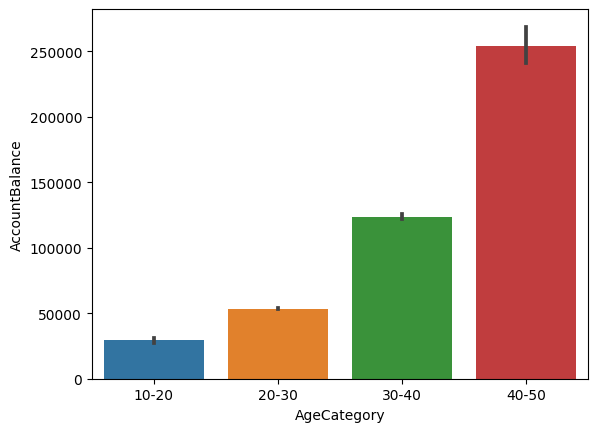

In [41]:
sns.barplot(x='AgeCategory', y='AccountBalance', data=age)

In [42]:
mean_age = age.groupby('AgeCategory').agg({'AccountBalance':'mean','CustomerID':'count', 'NoOfTransactions':'sum', 'TransactionAmount':'mean'})
mean_age = mean_age.reset_index()
mean_age.columns = ['AgeCategory','MeanAccountBalance', 'NoOfCustomers', 'NoOfTransactions', 'MeanTransactionAmount']
mean_age

,AgeCategory,MeanAccountBalance,NoOfCustomers,NoOfTransactions,MeanTransactionAmount
0,10-20,29239.786687,17118,17359,847.898291
1,20-30,53594.343960,487681,566861,1055.358987
2,30-40,123562.074524,246861,290609,1706.035725
3,40-50,253923.021049,24963,25370,2322.611879


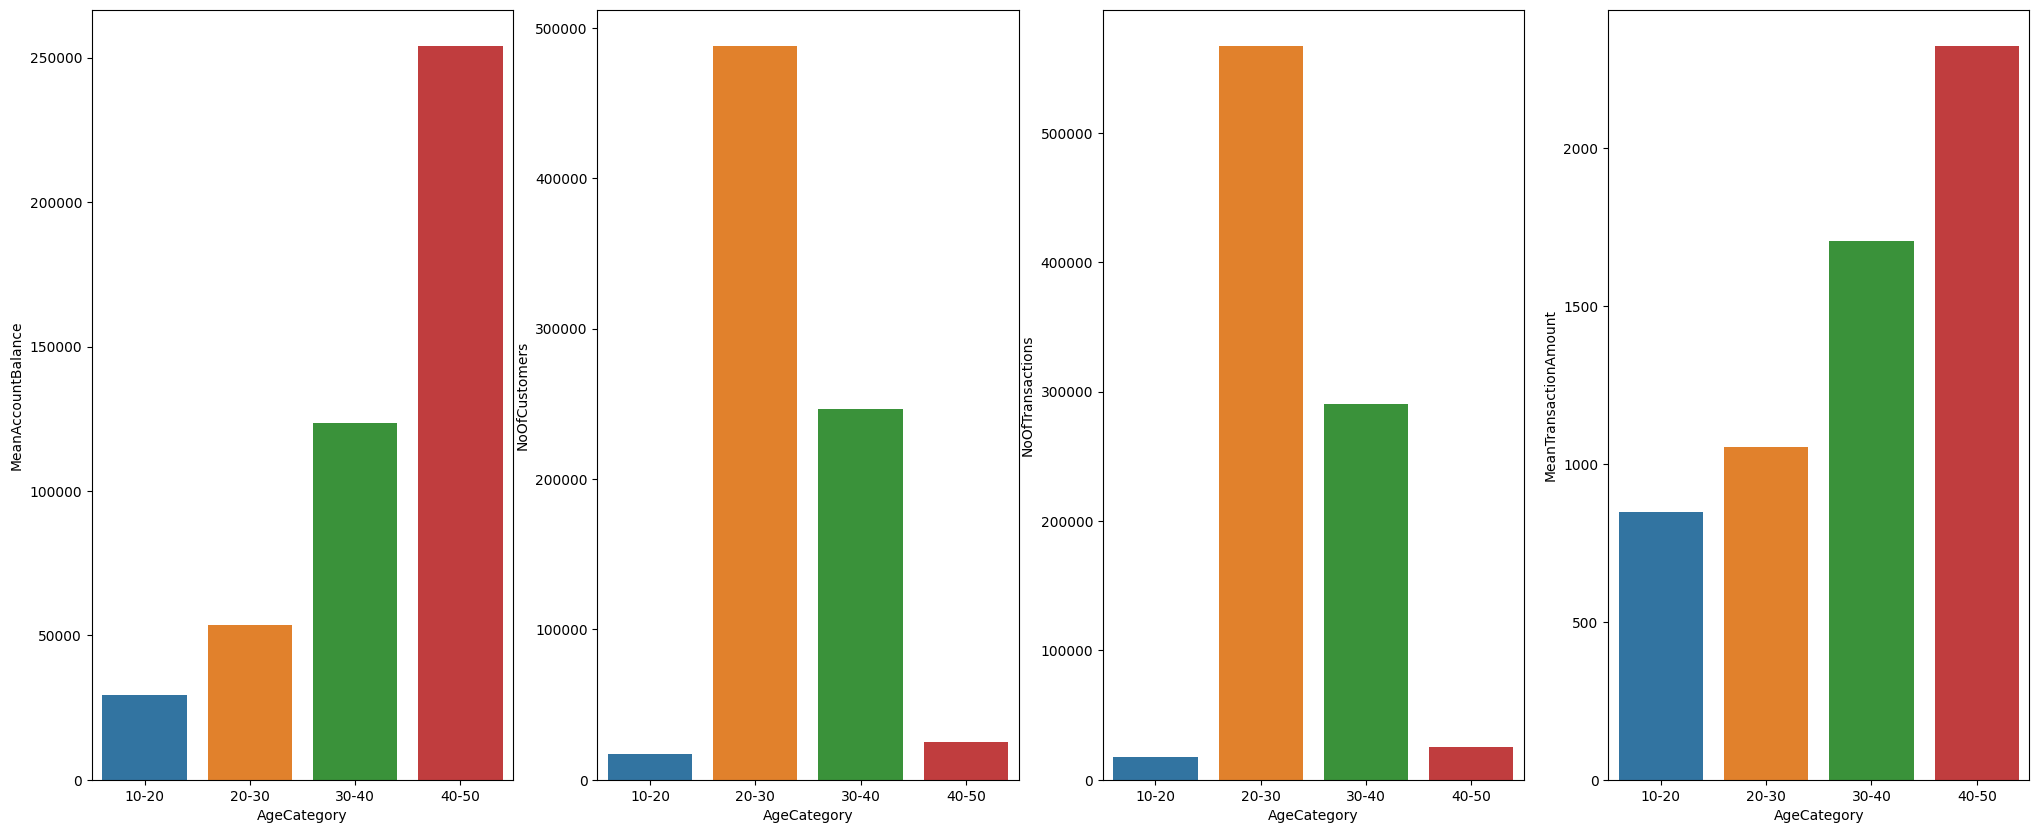

In [43]:
features = ['MeanAccountBalance','NoOfCustomers','NoOfTransactions','MeanTransactionAmount']

fig, ax = plt.subplots(1, 4, figsize=(25, 10))

for i, feature in enumerate(features):
    sns.barplot(x='AgeCategory', y=feature, data=mean_age, ax=ax[i])

In [44]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,month_year
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22,2016-02-01
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20,2016-02-01
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43,2016-02-01
4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28,2016-02-01
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,566.0,24,2016-02-01


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900359 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            900359 non-null  object        
 1   CustomerID               900359 non-null  object        
 2   CustomerDOB              900359 non-null  datetime64[ns]
 3   CustGender               900359 non-null  object        
 4   CustLocation             900359 non-null  object        
 5   CustAccountBalance       900359 non-null  float64       
 6   TransactionDate          900359 non-null  datetime64[ns]
 7   TransactionAmount (INR)  900359 non-null  float64       
 8   CustomerAge              900359 non-null  int64         
 9   month_year               900359 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 75.6+ MB


In [46]:
df.to_csv('data/cleaned_data.csv', index=False)